kNN es uno de los algoritmos de clasificación más simples disponibles para el aprendizaje supervisado. La idea es buscar las coincidencias más cercanas de los datos de prueba en el espacio de características

Entonces, aquí etiquetamos a la familia Roja como Clase-0 (indicada por 0) y a la familia Azul como Clase-1 (indicada por 1). Creamos 25 vecinos o 25 datos de entrenamiento y etiquetamos a cada uno de ellos como parte de Clase-0 o Clase-1. Podemos hacer esto con la ayuda de un generador de números aleatorios de NumPy.

Luego podemos trazarlo con la ayuda de Matplotlib. Los vecinos rojos se muestran como triángulos rojos y los vecinos azules se muestran como cuadrados azules.

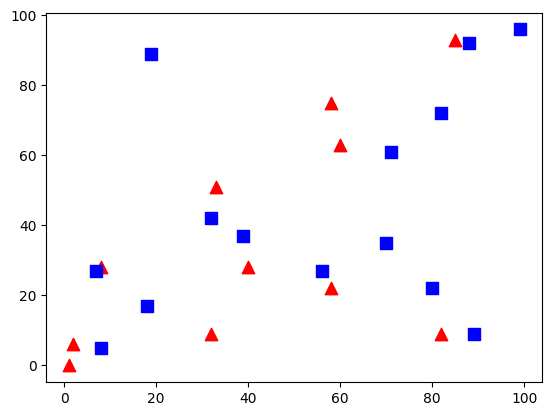

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# Label each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)
# Take Red neighbours and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# Take Blue neighbours and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
plt.show()

result:  [[1.]]

neighbours:  [[1. 0. 1.]]

distance:  [[ 324.  596. 1010.]]



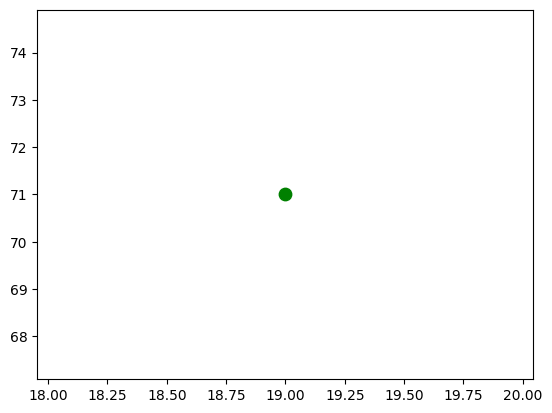

In [2]:
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print( "result:  {}\n".format(results) )
print( "neighbours:  {}\n".format(neighbours) )
print( "distance:  {}\n".format(dist) )
plt.show()

- OCR de dígitos escritos a mano


Nuestro objetivo es crear una aplicación que pueda leer dígitos escritos a mano. Para ello necesitamos algunos datos de entrenamiento y algunos datos de prueba. OpenCV viene con una imagen digits.png (en la carpeta opencv/samples/data/) que tiene 5000 dígitos escritos a mano (500 por cada dígito). Cada dígito es una imagen de 20x20. Entonces, nuestro primer paso es dividir esta imagen en 5000 imágenes de dígitos diferentes. Luego, para cada dígito (imagen de 20x20), lo aplanamos en una sola fila con 400 píxeles. Ese es nuestro conjunto de características, es decir, valores de intensidad de todos los píxeles. Es el conjunto de funciones más simple que podemos crear. Usamos las primeras 250 muestras de cada dígito como datos de entrenamiento y las otras 250 muestras como datos de prueba.

In [4]:
import numpy as np
import cv2 as cv
img = cv.imread('resources/digits.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)
# Now we prepare the training data and test data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

91.76


En lugar de encontrar estos datos de entrenamiento cada vez que inicio la aplicación, será mejor que los guarde para que la próxima vez pueda leer estos datos directamente desde un archivo y comenzar la clasificación. Esto se puede hacer con la ayuda de algunas funciones de Numpy como np.savetxt, np.savez, np.load, etc.

In [6]:
# Save the data
np.savez('resources/knn_data.npz',train=train, train_labels=train_labels)
# Now load the data
with np.load('resources/knn_data.npz') as data:
    print( data.files )
    train = data['train']
    train_labels = data['train_labels']

['train', 'train_labels']


- OCR del alfabeto inglés

Haremos lo mismo con el alfabeto inglés, pero hay un ligero cambio en los datos y el conjunto de características. Aquí, en lugar de imágenes, OpenCV viene con un archivo de datos, letter-recognition.data en la carpeta opencv/samples/cpp/. Si lo abres, verás 20.000 líneas que, a primera vista, pueden parecer basura. En realidad, en cada fila, la primera columna es una letra que es nuestra etiqueta. Los siguientes 16 números son las diferentes características. 

In [7]:
import cv2 as cv
import numpy as np
# Load the data and convert the letters to numbers
data= np.loadtxt('resources/letter-recognition.data', dtype= 'float32', delimiter = ',',
                    converters= {0: lambda ch: ord(ch)-ord('A')})
# Split the dataset in two, with 10000 samples each for training and test sets
train, test = np.vsplit(data,2)
# Split trainData and testData into features and responses
responses, trainData = np.hsplit(train,[1])
labels, testData = np.hsplit(test,[1])
# Initiate the kNN, classify, measure accuracy
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, result, neighbours, dist = knn.findNearest(testData, k=5)
correct = np.count_nonzero(result == labels)
accuracy = correct*100.0/10000
print( accuracy )

93.06
